In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Import Data

In [2]:
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')

In [3]:
geographic_data = pd.read_csv("./Data/geographic_data.csv") 
airport_data = pd.read_csv("./Data/training_set_airport_data.csv", parse_dates=['Flight Datetime','AOBT','ATOT'], date_parser=dateparse)
weather_data = pd.read_csv("./Data/weather_data.csv", parse_dates=['time_hourly'], date_parser=dateparse)
#aircraft_data = pd.ExcelFile("./Data/ACchar.xlsx")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1. Main training file

In [4]:
# Clean airport_data column names
airport_data.columns = airport_data.columns.str.replace(' ', '_')
# Create time columns
airport_data['hour'] = airport_data['Flight_Datetime'].map(lambda d: d.hour)
airport_data['minute'] = airport_data['Flight_Datetime'].map(lambda d: d.minute)
airport_data['year'] = airport_data['Flight_Datetime'].map(lambda d: d.year)
airport_data['month'] = airport_data['Flight_Datetime'].map(lambda d: d.month)
airport_data['day'] = airport_data['Flight_Datetime'].map(lambda d: d.day)
airport_data

,Flight_Datetime,Aircraft_Model,AOBT,ATOT,Stand,Runway,hour,minute,year,month,day
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,6,0,2015,1,1
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,6,10,2015,1,1
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,6,15,2015,1,1
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,6,20,2015,1,1
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,6,20,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...
543808,2018-12-31 21:15:00,A350-900,2018-12-31 21:02:00,2018-12-31 21:20:00,STAND_150,RUNWAY_3,21,15,2018,12,31
543809,2018-12-31 21:30:00,B787-900,2018-12-31 21:24:00,2018-12-31 21:38:00,STAND_77,RUNWAY_1,21,30,2018,12,31
543810,2018-12-31 21:50:00,A330-200,2018-12-31 22:27:00,2018-12-31 22:37:00,STAND_120,RUNWAY_1,21,50,2018,12,31
543811,2018-12-31 22:10:00,B787-800 Dreamliner,2018-12-31 22:09:00,2018-12-31 22:29:00,STAND_49,RUNWAY_2,22,10,2018,12,31


In [5]:
# Create dependent variable
airport_data['taxi_time']= airport_data['ATOT'] - airport_data['AOBT']
airport_data['taxi_seconds']= airport_data['taxi_time']/ np.timedelta64(1, 'm')*60

In [6]:
airport_data

,Flight_Datetime,Aircraft_Model,AOBT,ATOT,Stand,Runway,hour,minute,year,month,day,taxi_time,taxi_seconds
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,6,0,2015,1,1,0 days 00:09:00,540.0
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,6,10,2015,1,1,0 days 00:10:00,600.0
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,6,15,2015,1,1,0 days 00:11:00,660.0
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,6,20,2015,1,1,0 days 00:12:00,720.0
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,6,20,2015,1,1,0 days 00:13:00,780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543808,2018-12-31 21:15:00,A350-900,2018-12-31 21:02:00,2018-12-31 21:20:00,STAND_150,RUNWAY_3,21,15,2018,12,31,0 days 00:18:00,1080.0
543809,2018-12-31 21:30:00,B787-900,2018-12-31 21:24:00,2018-12-31 21:38:00,STAND_77,RUNWAY_1,21,30,2018,12,31,0 days 00:14:00,840.0
543810,2018-12-31 21:50:00,A330-200,2018-12-31 22:27:00,2018-12-31 22:37:00,STAND_120,RUNWAY_1,21,50,2018,12,31,0 days 00:10:00,600.0
543811,2018-12-31 22:10:00,B787-800 Dreamliner,2018-12-31 22:09:00,2018-12-31 22:29:00,STAND_49,RUNWAY_2,22,10,2018,12,31,0 days 00:20:00,1200.0


## 2. Geographical data

In [7]:
#transform stand to upper case
geographic_data["stand"] = geographic_data["stand"].str.upper()

#produce a pd runway 
runway_data = geographic_data.iloc[:, 0:3]
runway_data.drop_duplicates(keep="first",inplace=True) 

#produce a pd stand
stand_data = geographic_data.iloc[:, 3:6]
stand_data.drop_duplicates(keep="first",inplace=True) 

In [8]:
runway_data

,runway,Lat_runway,Lng_runway
0,RUNWAY_1,54.755307,-0.023040
1,RUNWAY_2,54.757120,-0.024107
1805,RUNWAY_3,54.761173,0.019840
11680,RUNWAY_4,54.761493,0.008320


In [9]:
stand_data

,stand,Lat_stand,Lng_stand
0,STAND_0,54.764575,0.000356
1,STAND_1,54.764690,0.024353
2,STAND_2,54.769141,0.011816
3,STAND_3,54.772184,0.006803
4,STAND_4,54.767007,0.008593
...,...,...,...
14492,STAND_162,54.764551,0.007704
15938,STAND_163,54.765164,0.003849
16345,STAND_164,54.769665,0.007627
16689,STAND_165,54.772145,0.005333


In [10]:
#Left join airport with geographic data on "runway" & "stand"
train_data= pd.merge(airport_data, runway_data, how="left", left_on="Runway", right_on= "runway")
train_data= pd.merge(train_data, stand_data, how="left", left_on="Stand", right_on= "stand")

In [11]:
train_data.drop(['runway','stand','taxi_time'], axis=1, inplace=True)
list(train_data.columns)

['Flight_Datetime',
 'Aircraft_Model',
 'AOBT',
 'ATOT',
 'Stand',
 'Runway',
 'hour',
 'minute',
 'year',
 'month',
 'day',
 'taxi_seconds',
 'Lat_runway',
 'Lng_runway',
 'Lat_stand',
 'Lng_stand']

## 3. Weather data

In [12]:
# drop the duplicates line in weather_data
weather_data.drop_duplicates(keep="first",inplace=True)

weather_data

,time_hourly,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
0,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.80,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
10,2015-01-01 07:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,45.62,40.50,42.80,0.90,1031.0,10.29,14.75,191.0,0.75,0.0,5.591,None,0.0,310.4
45,2015-01-01 08:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,45.67,39.74,42.80,0.90,1030.9,12.76,13.52,210.0,0.75,0.0,5.272,None,0.0,310.4
68,2015-01-01 09:00:00,Overcast,cloudy,0.0,0.0,44.65,38.44,42.80,0.93,1031.5,12.76,16.55,210.0,1.00,0.0,3.730,None,0.0,310.4
87,2015-01-01 10:00:00,Overcast,cloudy,0.0,0.0,44.65,38.89,42.80,0.93,1030.7,11.39,12.95,191.0,1.00,0.0,3.730,None,0.0,310.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678868,2019-12-31 19:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.49,38.74,41.55,0.89,1031.7,11.24,18.59,91.0,0.75,0.0,6.933,None,0.0,316.3
678878,2019-12-31 20:00:00,Partly Cloudy,partly-cloudy-night,0.0,0.0,44.39,39.13,42.47,0.93,1031.7,9.89,19.32,92.0,0.51,0.0,7.456,None,0.0,315.5
678893,2019-12-31 21:00:00,Clear,clear-night,0.0,0.0,44.17,39.56,39.23,0.83,1031.8,8.25,20.27,102.0,0.26,0.0,6.391,None,0.0,313.3
678898,2019-12-31 22:00:00,Clear,clear-night,0.0,0.0,42.40,37.00,40.55,0.93,1031.7,9.11,19.94,93.0,0.08,0.0,10.000,None,0.0,311.6


In [13]:
#Create new column rounding flight datetime to nearest hour for mapping
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

train_data["Flight_Datetime_map"] = train_data["Flight_Datetime"].map(lambda d: hour_rounder(d))

#Left join train data with weather data on "Flight_Datetime_map" & "time_hourly"
train_data= pd.merge(train_data, weather_data, how="left", left_on="Flight_Datetime_map", right_on= "time_hourly")


In [14]:
train_data[['Flight_Datetime_map', 'Flight_Datetime','time_hourly']]

,Flight_Datetime_map,Flight_Datetime,time_hourly
0,2015-01-01 06:00:00,2015-01-01 06:00:00,2015-01-01 06:00:00
1,2015-01-01 06:00:00,2015-01-01 06:10:00,2015-01-01 06:00:00
2,2015-01-01 06:00:00,2015-01-01 06:15:00,2015-01-01 06:00:00
3,2015-01-01 06:00:00,2015-01-01 06:20:00,2015-01-01 06:00:00
4,2015-01-01 06:00:00,2015-01-01 06:20:00,2015-01-01 06:00:00
...,...,...,...
543808,2018-12-31 21:00:00,2018-12-31 21:15:00,2018-12-31 21:00:00
543809,2018-12-31 22:00:00,2018-12-31 21:30:00,2018-12-31 22:00:00
543810,2018-12-31 22:00:00,2018-12-31 21:50:00,2018-12-31 22:00:00
543811,2018-12-31 22:00:00,2018-12-31 22:10:00,2018-12-31 22:00:00


In [15]:
train_data.drop(['Flight_Datetime_map','time_hourly'], axis=1, inplace=True)
list(train_data.columns)

['Flight_Datetime',
 'Aircraft_Model',
 'AOBT',
 'ATOT',
 'Stand',
 'Runway',
 'hour',
 'minute',
 'year',
 'month',
 'day',
 'taxi_seconds',
 'Lat_runway',
 'Lng_runway',
 'Lat_stand',
 'Lng_stand',
 'summary',
 'icon',
 'precipIntensity',
 'precipProbability',
 'temperature',
 'apparentTemperature',
 'dewPoint',
 'humidity',
 'pressure',
 'windSpeed',
 'windGust',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility',
 'precipType',
 'precipAccumulation',
 'ozone']

# EDA
## Distribution of targets

In [16]:
train_data['taxi_seconds'].describe()

count    543813.000000
mean       1125.287112
std         490.325000
min      -13080.000000
25%         840.000000
50%        1080.000000
75%        1320.000000
max       39360.000000
Name: taxi_seconds, dtype: float64

In [17]:
datetime_targets= train_data[["Flight_Datetime", "taxi_seconds"]]

In [18]:
datetime_targets.set_index("Flight_Datetime", inplace=True)

In [19]:
datetime_targets[(datetime_targets.taxi_seconds < 0 )] # weird numbers

,taxi_seconds
Flight_Datetime,
2017-09-05 09:55:00,-480.0
2018-06-17 05:05:00,-13080.0


In [20]:
cut_bins = [0, 500, 1000, 1500, 2000, 5000, 10000, 39360]
datetime_targets['taxi_seconds']= pd.cut(datetime_targets['taxi_seconds'], bins=cut_bins)
datetime_targets['taxi_seconds'].value_counts(sort=False)

<ipython-input-20-30a38c69cae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_targets['taxi_seconds']= pd.cut(datetime_targets['taxi_seconds'], bins=cut_bins)


(0, 500]           12788
(500, 1000]       217575
(1000, 1500]      244868
(1500, 2000]       50864
(2000, 5000]       16812
(5000, 10000]        703
(10000, 39360]        33
Name: taxi_seconds, dtype: int64

<AxesSubplot:>

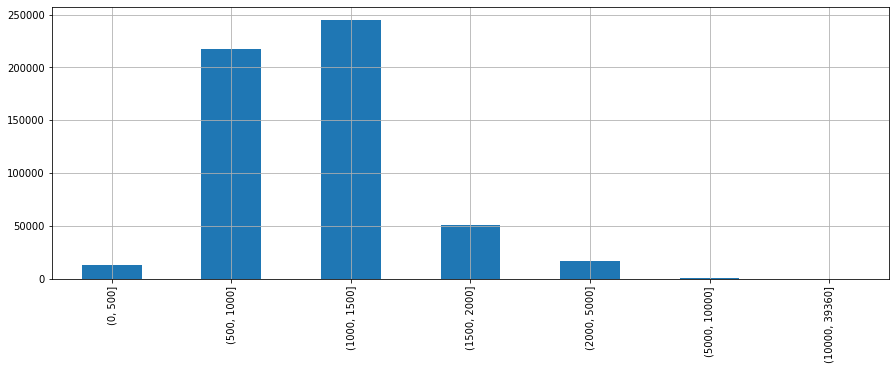

In [21]:
datetime_targets.taxi_seconds.value_counts(sort=False).plot(kind="bar", figsize=(15, 5), grid=True)

## Analyse the targets over time

In [22]:
dummy_targets = pd.get_dummies(datetime_targets["taxi_seconds"])

<AxesSubplot:xlabel='Flight_Datetime'>

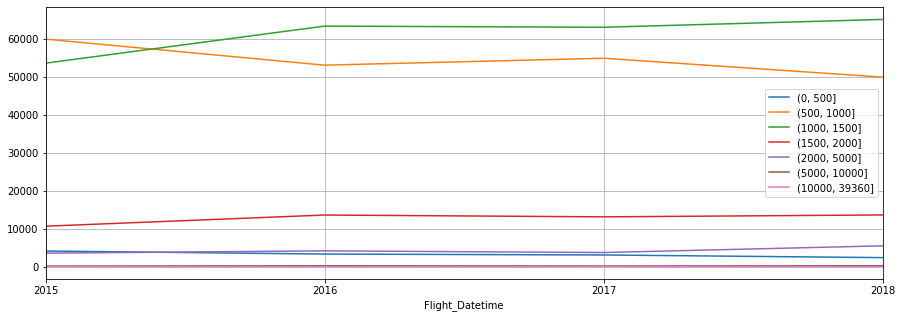

In [23]:
dummy_targets.resample("y").agg("sum").plot(figsize=(15, 5), grid=True)

<AxesSubplot:xlabel='Flight_Datetime'>

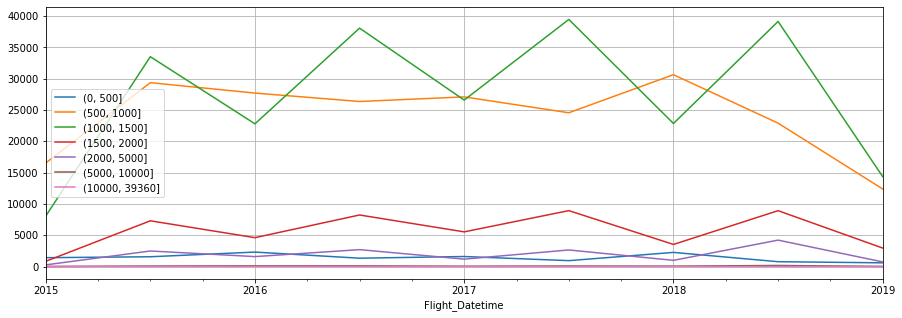

In [24]:
dummy_targets.resample("2Q").agg("sum").plot(figsize=(15, 5), grid=True)


<AxesSubplot:xlabel='Flight_Datetime'>

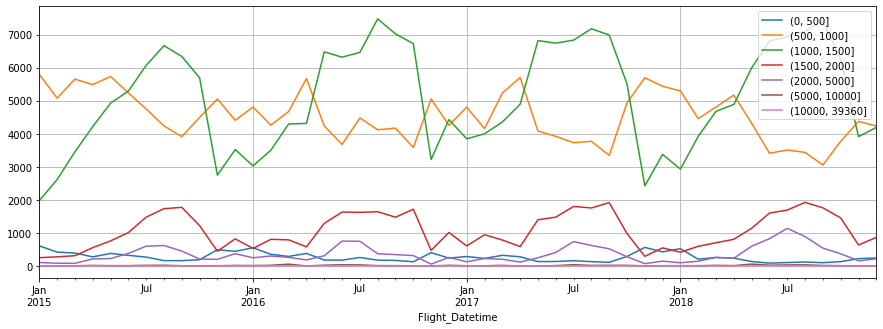

In [25]:
dummy_targets.resample("m").agg("sum").plot(figsize=(15, 5), grid=True)

<AxesSubplot:xlabel='Flight_Datetime'>

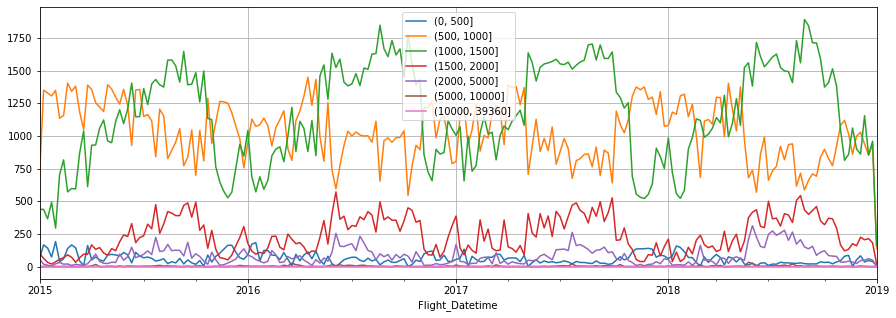

In [26]:
dummy_targets.resample("w").agg("sum").plot(figsize=(15, 5), grid=True)